In [127]:
# lstm 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# fix random seed for reproducibility
np.random.seed(7)

In [130]:
dataset = pd.read_csv("data/clid-leesin.csv")
target = dataset[["target_x","target_y"]]
training = dataset.drop(["target_x","target_y"], axis=1)

In [131]:
dataset = dataset.dropna()

## creating angle calculator

In [132]:
dataset["dx"] = dataset["target_x"] - dataset["player_x"]
dataset["dy"] = dataset["target_y"] - dataset["player_y"]

In [133]:
dataset["distance"] = (dataset["dx"]**2 + dataset["dy"])**.5

In [134]:
dataset["direction"] = np.tanh(dataset["dy"]/dataset["dx"])

In [135]:
dataset[["direction", "distance"]]

,direction,distance
0,0.925042,4020.811361
1,-0.548100,1941.307807
2,-0.745782,4505.518283
3,-0.608956,1708.353593
4,-0.999992,1303.094778
5,0.991115,1709.646455
6,-0.244620,3143.875157
7,-0.199554,2205.101131
8,0.999999,877.340869
9,0.994995,2659.496569


In [136]:
target_cols = ["target_x", "target_y", "dx", "dy", "direction", "distance"]
targets = dataset[target_cols]
target = targets["distance"]
features = dataset.drop(target_cols, axis=1)

In [137]:
target.shape

(29,)

In [138]:
scaler_feat = MinMaxScaler(feature_range=(0, 1))
scaler_targ = MinMaxScaler(feature_range=(0, 1))
features_s = pd.DataFrame(scaler_feat.fit_transform(features), columns=features.columns)
target_s = scaler_targ.fit_transform(target.values.reshape(-1, 1))

In [139]:
features_s.describe()

,timestamp,0currentGold,1currentGold,2currentGold,3currentGold,4currentGold,5currentGold,6currentGold,7currentGold,8currentGold,...,2y,3y,4y,5y,6y,7y,8y,9y,player_x,player_y
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.500005,0.236118,0.419740,0.410083,0.370162,0.408987,0.397193,0.354391,0.238547,0.443586,...,0.506368,0.319759,0.355427,0.736387,0.515248,0.596610,0.360657,0.415348,0.454669,0.445877
std,0.304098,0.220685,0.282477,0.282001,0.275402,0.291598,0.265048,0.261002,0.245884,0.297741,...,0.235434,0.265808,0.296022,0.210439,0.296651,0.244201,0.290577,0.319187,0.276667,0.255286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249997,0.072215,0.135158,0.160759,0.175190,0.213450,0.240291,0.144021,0.042934,0.169453,...,0.339831,0.102668,0.106277,0.590847,0.260956,0.431113,0.096358,0.178384,0.271435,0.254617
50%,0.500007,0.200326,0.433665,0.389873,0.300253,0.311891,0.330097,0.351479,0.169033,0.464286,...,0.572119,0.229458,0.286090,0.796886,0.591860,0.532065,0.308561,0.294974,0.357177,0.466345
75%,0.750016,0.265606,0.549751,0.591139,0.552911,0.608187,0.609223,0.573511,0.295132,0.674012,...,0.602373,0.502635,0.509075,0.899690,0.761694,0.769397,0.537623,0.614840,0.628040,0.581820
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


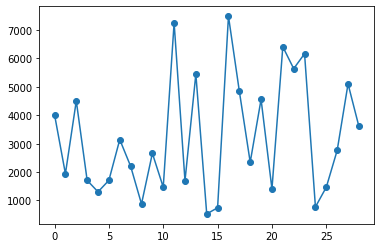

In [140]:
plt.plot(targets["distance"], marker="o")

In [141]:
features_s.values

array([[0.        , 0.20399837, 0.4145937 , ..., 1.        , 0.        ,
        0.        ],
       [0.03571832, 0.        , 0.        , ..., 0.29497376, 0.38340486,
        0.49174644],
       [0.07142951, 0.02570379, 0.10033167, ..., 0.        , 0.19828326,
        0.58181955],
       ...,
       [0.9285693 , 0.12403101, 0.11525705, ..., 0.17838397, 0.15555556,
        0.26298334],
       [0.96428703, 0.05263158, 0.51160862, ..., 0.29036106, 0.41888412,
        0.32056983],
       [1.        , 0.23011016, 0.9013267 , ..., 0.96985844, 0.90577015,
        0.5744328 ]])

In [142]:
trainX = np.reshape(features_s.values, (features_s.shape[0], 1, features_s.shape[1]))
trainY = target_s#["distance"]
#trainY = np.reshape(targets_s.values, (targets_s.shape[0], 1, targets_s.shape[1]))

In [143]:
trainX.shape

(29, 1, 63)

In [144]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 63)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
29/29 - 0s - loss: 0.1214
Epoch 2/100
29/29 - 0s - loss: 0.0900
Epoch 3/100
29/29 - 0s - loss: 0.0874
Epoch 4/100
29/29 - 0s - loss: 0.0854
Epoch 5/100
29/29 - 0s - loss: 0.0851
Epoch 6/100
29/29 - 0s - loss: 0.0834
Epoch 7/100
29/29 - 0s - loss: 0.0826
Epoch 8/100
29/29 - 0s - loss: 0.0838
Epoch 9/100
29/29 - 0s - loss: 0.0803
Epoch 10/100
29/29 - 0s - loss: 0.0793
Epoch 11/100
29/29 - 0s - loss: 0.0813
Epoch 12/100
29/29 - 0s - loss: 0.0791
Epoch 13/100
29/29 - 0s - loss: 0.0785
Epoch 14/100
29/29 - 0s - loss: 0.0774
Epoch 15/100
29/29 - 0s - loss: 0.0759
Epoch 16/100
29/29 - 0s - loss: 0.0810
Epoch 17/100
29/29 - 0s - loss: 0.0728
Epoch 18/100
29/29 - 0s - loss: 0.0745
Epoch 19/100
29/29 - 0s - loss: 0.0754
Epoch 20/100
29/29 - 0s - loss: 0.0722
Epoch 21/100
29/29 - 0s - loss: 0.0709
Epoch 22/100
29/29 - 0s - loss: 0.0690
Epoch 23/100
29/29 - 0s - loss: 0.0686
Epoch 24/100
29/29 - 0s - loss: 0.0667
Epoch 25/100
29/29 - 0s - loss: 0.0668
Epoch 26/100
29/29 - 0s - loss: 0.

In [145]:
trainPredict = model.predict(trainX)
trainPredict = scaler_targ.inverse_transform(trainPredict)
trainY = scaler_targ.inverse_transform(trainY)
#testPredict = scaler.inverse_transform(testPredict)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
#trainPredict

In [151]:
np.concatenate((trainY, trainPredict), axis=1)

array([[4020.81136091, 4083.78515625],
       [1941.30780661, 2516.3269043 ],
       [4505.51828317, 3194.29589844],
       [1708.35359338, 1818.94348145],
       [1303.09477783, 1241.69299316],
       [1709.64645468, 1145.66784668],
       [3143.87515655, 2161.62524414],
       [2205.10113147, 3054.19140625],
       [ 877.34086876, 1215.06384277],
       [2659.4965689 , 3326.89941406],
       [1468.9758337 , 3283.96020508],
       [7255.77776672, 5736.76416016],
       [1691.69589466, 1665.90698242],
       [5452.54830332, 4591.04882812],
       [ 526.11405608, 1407.19848633],
       [ 743.19041974,  812.06152344],
       [7488.0268429 , 6557.09277344],
       [4846.89880233, 4733.93847656],
       [2346.01044328, 3506.68994141],
       [4560.12181855, 3719.03198242],
       [1404.66188102, 2025.79052734],
       [6413.40525774, 6048.92041016],
       [5641.75717308, 5152.01513672],
       [6167.57180745, 6485.16943359],
       [ 771.80826635, 1255.23168945],
       [1467.24640057, 15

In [147]:
trainScore

739.211217725087

In [78]:
trainPredict.shape

(29, 1)

In [158]:
def model_pred(test):
    return model.predict(test)

In [159]:
import pickle
pickle.dump((scaler_feat, scaler_targ), open("data/scalers.p", "wb"))

In [164]:
model.save("data/clid-model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: data/clid-model/assets


In [165]:
model.get_weights()

[array([[-0.1813578 ,  0.2751784 ,  0.25793973, ...,  0.28271237,
          0.26046893,  0.03042353],
        [ 0.06864045,  0.4479636 ,  0.03968944, ...,  0.23647317,
         -0.03765737, -0.23765263],
        [ 0.01375426, -0.02112867,  0.2460761 , ...,  0.14342253,
         -0.04807306,  0.50932187],
        ...,
        [ 0.11862105, -0.21597554, -0.19649044, ..., -0.50649357,
         -0.41592935, -0.1336704 ],
        [ 0.07169003,  0.61806214,  0.25478008, ...,  0.2485077 ,
          0.20115456, -0.19801764],
        [-0.12957539, -0.06527783, -0.3110101 , ...,  0.13006397,
         -0.20166136, -0.14413771]], dtype=float32),
 array([[-0.4316789 , -0.08695038,  0.06651702, -0.32129967,  0.26051491,
          0.4354233 ,  0.00061892, -0.17577493, -0.3080677 , -0.35300803,
         -0.00403389, -0.08323356, -0.22315627,  0.346959  , -0.09501057,
         -0.06637246],
        [ 0.15302816, -0.4744182 ,  0.19062194,  0.08691069, -0.1997359 ,
          0.22502589,  0.21242791, -0.0